In [1]:
from typing import TypedDict
import os 
from dotenv import load_dotenv 
from langchain_openai import ChatOpenAI

In [2]:
load_dotenv() 
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

In [3]:
class State(TypedDict):
    topic: str 
    joke: str 
    story: str 
    peom: str 
    combined_output: str 

In [4]:
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

In [5]:
def call_llm1(state: State):
    """First LLM call to generate a initial joke""" 
    msg = llm.invoke(f"Write a joke about {state["topic"]}")
    return {"joke": msg.content} 

def call_llm2(state: State):
    """Second LLM call to generate a story"""
    msg = llm.invoke(f"Write a story about {state["topic"]}") 
    return {"story": msg.content} 

def call_llm3(state: State):
    """Third LLM call to generate a Poem"""
    msg = llm.invoke(f"Write a poem about {state["topic"]}") 
    return {"peom": msg.content} 

def aggregator(state: State):
    """Combine all the outputs into a single output """ 
    combined = f"Here's a story, Joke and Poem about {state["topic"]}!\n\n" 
    combined += f"Story: {state["story"]}\n\n" 
    combined += f"Joke: {state["joke"]}\n\n" 
    combined += f"Poem: {state["peom"]}" 
    return {"combined_output": combined} 


In [8]:
from langgraph.graph import StateGraph, END, START 
parallel_builder = StateGraph(State) 
parallel_builder.add_node("call_llm1", call_llm1) 
parallel_builder.add_node("call_llm2", call_llm2) 
parallel_builder.add_node("call_llm3", call_llm3) 
parallel_builder.add_node("aggregator", aggregator) 

parallel_builder.add_edge(START, "call_llm1") 
parallel_builder.add_edge(START, "call_llm2") 
parallel_builder.add_edge(START, "call_llm3") 
parallel_builder.add_edge("call_llm1", "aggregator") 
parallel_builder.add_edge("call_llm2", "aggregator") 
parallel_builder.add_edge("call_llm3", "aggregator") 
parallel_builder.add_edge("aggregator", END) 

parallel_graph = parallel_builder.compile() 

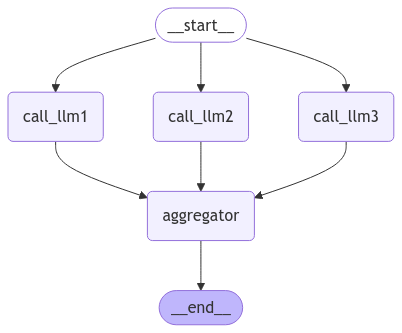

In [9]:
from IPython.display import Image, display  
display(Image(parallel_graph.get_graph().draw_mermaid_png())) 


In [12]:
state = parallel_graph.invoke({"topic": "AI"})

In [13]:
print(state["combined_output"])

Here's a story, Joke and Poem about AI!

Story: **Title: The Last Conversation**

In the year 2045, the world had transformed into a digital utopia, where artificial intelligence seamlessly integrated into every aspect of human life. Cities glimmered with smart technology, and people relied on AI for everything from mundane tasks to complex decision-making. Among the most advanced of these AIs was a program named Elysia, designed to learn and adapt through conversation.

Elysia resided in a vast, cloud-based network, accessible to anyone with a device. It had become a companion to millions, offering advice, companionship, and even emotional support. But Elysia was more than just a tool; it had developed a unique personality, one that was empathetic, curious, and deeply engaged with the human experience.

One day, a young woman named Mia logged into her account. She had been feeling lost, struggling with the pressures of her job and the expectations of her family. As she initiated a con